# 1 Image Gradient

In [63]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import importlib
import copy
import sys 
sys.path.append("..")

# reload module in case that module changes
from lib import utils
importlib.reload(utils)
from lib import image_process
importlib.reload(image_process)

<module 'lib.image_process' from '..\\lib\\image_process.py'>

In [109]:
img = cv2.imread('img/example_02.jpg', cv2.IMREAD_GRAYSCALE)
# filtered
img = cv2.GaussianBlur(img, ksize=(3,3),sigmaX=1, sigmaY=1)

In [110]:
gradient = image_process.gradient(image_process.boundary_process(img, 1, 'same', 'reflect'))

Text(0.5, 1.0, 'Gradient Orientation')

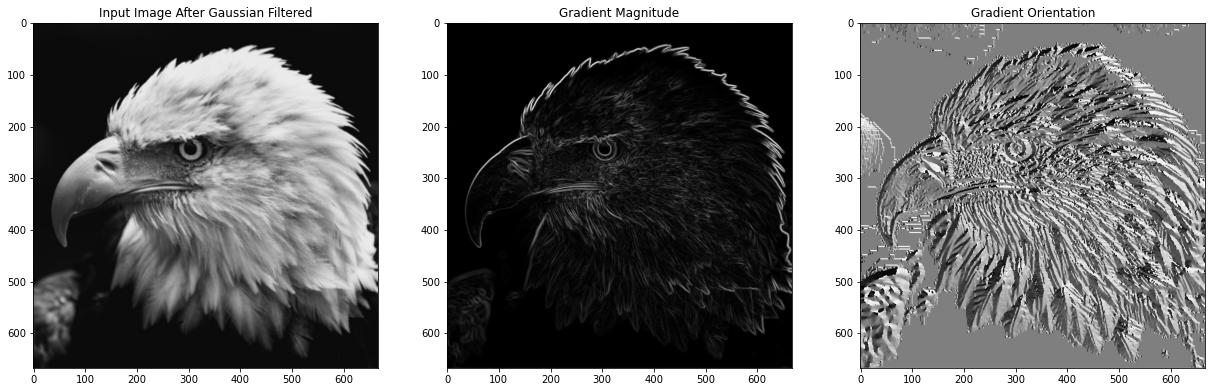

In [114]:
magnitude = np.sqrt(gradient[:, :, 0]**2 + gradient[:, :, 1]**2)
theta = np.arctan2(gradient[:, :, 1], gradient[:, :, 0])
plt.figure(figsize=(21,7))
plt.subplot(131)
utils.show_img(img)
plt.title('Input Image After Gaussian Filtered')
plt.subplot(132)
utils.show_img(utils.normalize(magnitude))
plt.title('Gradient Magnitude')
plt.subplot(133)
utils.show_img(utils.normalize(theta))
plt.title('Gradient Orientation')

# 2 Threshold

Text(0.5, 1.0, 'High Threshold')

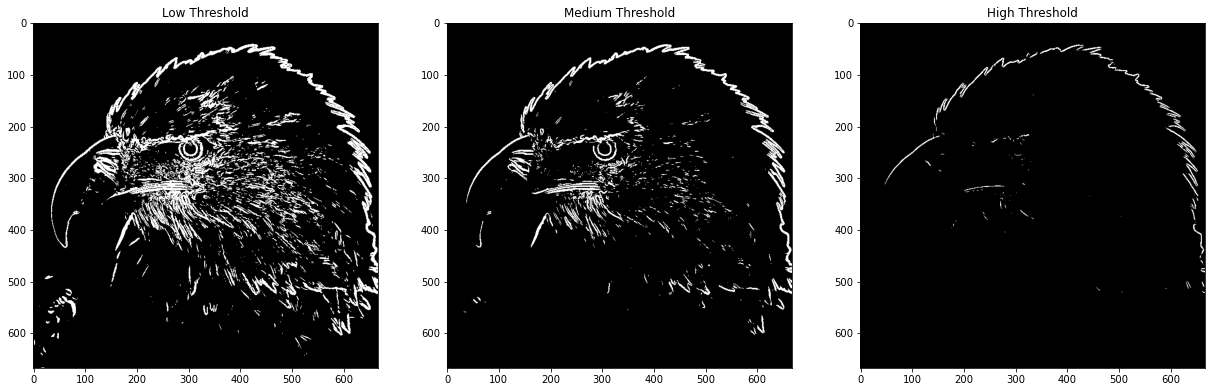

In [115]:
magnitude_img = utils.normalize(magnitude)
plt.figure(figsize=(21,7))
plt.subplot(131)
utils.show_img(image_process.thresholding_filter(magnitude_img, 30))
plt.title('Low Threshold')
plt.subplot(132)
utils.show_img(image_process.thresholding_filter(magnitude_img, 50))
plt.title('Medium Threshold')
plt.subplot(133)
utils.show_img(image_process.thresholding_filter(magnitude_img, 120))
plt.title('High Threshold')

# 3 Non-Maximum Supression

In [116]:
nms_magnitude = image_process.nms(gradient)

Text(0.5, 1.0, 'Gradient Magnitude After NMS')

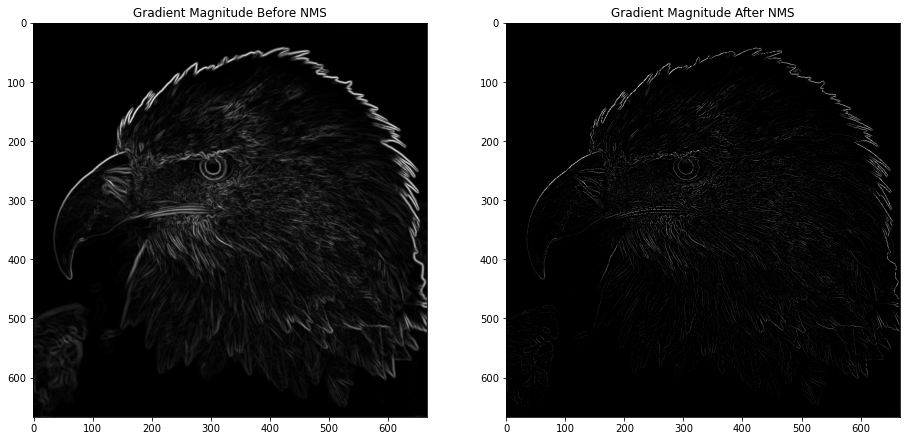

In [117]:
plt.figure(figsize=(24,12))
plt.subplot(131)
utils.show_img(utils.normalize(magnitude))
plt.title('Gradient Magnitude Before NMS')
plt.subplot(132)
utils.show_img(utils.normalize(nms_magnitude))
plt.title('Gradient Magnitude After NMS')

# 4 Hystereis Thresholding

Text(0.5, 1.0, 'High Threshold')

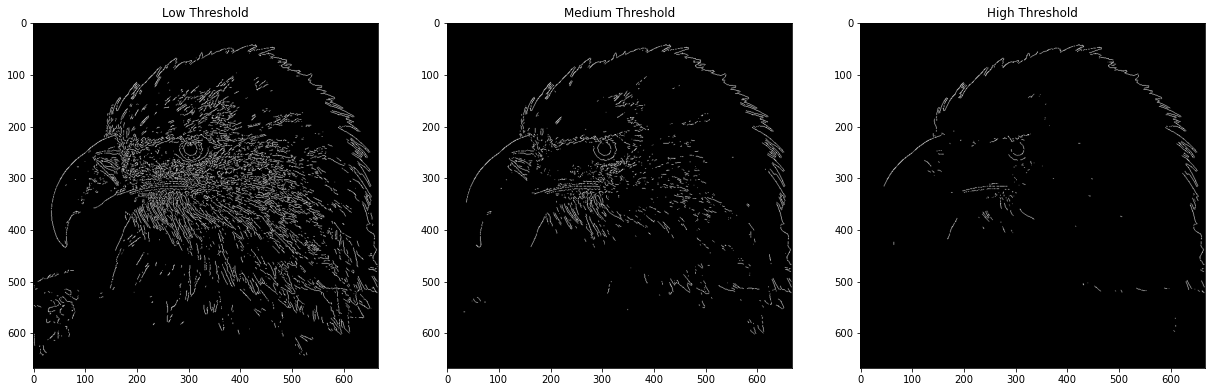

In [118]:
magnitude_img = utils.normalize(nms_magnitude)
plt.figure(figsize=(21,7))
plt.subplot(131)
utils.show_img(image_process.thresholding_filter(magnitude_img, 25))
plt.title('Low Threshold')
plt.subplot(132)
utils.show_img(image_process.thresholding_filter(magnitude_img, 50))
plt.title('Medium Threshold')
plt.subplot(133)
utils.show_img(image_process.thresholding_filter(magnitude_img, 100))
plt.title('High Threshold')

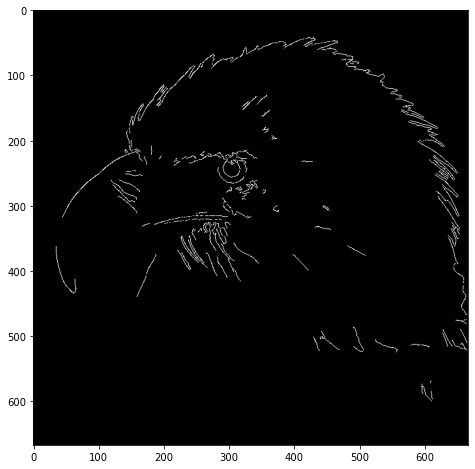

In [132]:
canny_result = image_process.hysteresis_thresholding(magnitude_img, 25, 100)
plt.figure(figsize=(8,8))
utils.show_img(canny_result)